In [1]:
import pandas as pd, numpy as np

In [2]:
cv = pd.read_csv('./data/covid19/PatientInfo.csv')

In [3]:
cv.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [4]:
cv.__len__()

5165

In [5]:
# 필요데이터만 추출

cv = cv[['patient_id', 'sex', 'age', 'country', 'province', 'city', 'infection_case', 'confirmed_date']]

In [6]:
cv.head()

,patient_id,sex,age,country,province,city,infection_case,confirmed_date
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,2020-01-23
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,2020-01-30
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2020-01-30
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,2020-01-30
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2020-01-31


In [7]:
cv.groupby(['confirmed_date','province','city'])[['patient_id']].count()

patient_id
confirmed_date province          city                     
2020-01-20     Incheon           etc                     1
2020-01-23     Seoul             Gangseo-gu              1
2020-01-26     Gyeonggi-do       Goyang-si               1
2020-01-27     Gyeonggi-do       Pyeongtaek-si           1
2020-01-30     Jeollabuk-do      Gunsan-si               1
...                                                    ...
2020-06-29     Seoul             Nowon-gu                1
                                 etc                     1
2020-06-30     Chungcheongnam-do Buyeo-gun               1
               Daejeon           Dong-gu                 3
                                 Seo-gu                  1

[2643 rows x 1 columns]

In [8]:
df = cv.pivot_table(index='confirmed_date',
               columns=['province','city'], 
               values='patient_id',
               aggfunc='count')

In [9]:
df.fillna(0,inplace=True)

In [10]:
df.reset_index(inplace=True)

In [11]:
df.reset_index()

province index confirmed_date  Busan                                 \
city                          Buk-gu Busanjin-gu Dong-gu Dongnae-gu   
0            0     2020-01-20    0.0         0.0     0.0        0.0   
1            1     2020-01-23    0.0         0.0     0.0        0.0   
2            2     2020-01-26    0.0         0.0     0.0        0.0   
3            3     2020-01-27    0.0         0.0     0.0        0.0   
4            4     2020-01-30    0.0         0.0     0.0        0.0   
..         ...            ...    ...         ...     ...        ...   
142        142     2020-06-26    0.0         0.0     0.0        0.0   
143        143     2020-06-27    0.0         0.0     0.0        0.0   
144        144     2020-06-28    0.0         0.0     0.0        0.0   
145        145     2020-06-29    0.0         0.0     0.0        1.0   
146        146     2020-06-30    0.0         0.0     0.0        0.0   

province                                                 ...     Seoul  \
city     Gangseo-gu Geumjeong-gu Gijang-gun Haeundae-gu  ... Songpa-gu   
0               0.0          0.0        0.0         0.0  ...       0.0   
1               0.0          0.0        0.0         0.0  ...       0.0   
2               0.0          0.0        0.0         0.0  ...       0.0   
3               0.0          0.0        0.0         0.0  ...       0.0   
4               0.0          0.0        0.0         0.0  ...       0.0   
..              ...          ...        ...         ...  ...       ...   
142             0.0          0.0        0.0         0.0  ...       0.0   
143             0.0          0.0        0.0         0.0  ...       1.0   
144             0.0          0.0        0.0         1.0  ...       1.0   
145             0.0          0.0        0.0         0.0  ...       0.0   
146             0.0          0.0        0.0         0.0  ...       0.0   

province                                               Ulsan                  \
city     Yangcheon-gu Yeongdeungpo-gu Yongsan-gu  etc Buk-gu Dong-gu Jung-gu   
0                 0.0             0.0        0.0  0.0    0.0     0.0     0.0   
1                 0.0             0.0        0.0  0.0    0.0     0.0     0.0   
2                 0.0             0.0        0.0  0.0    0.0     0.0     0.0   
3                 0.0             0.0        0.0  0.0    0.0     0.0     0.0   
4                 0.0             0.0        0.0  0.0    0.0     0.0     0.0   
..                ...             ...        ...  ...    ...     ...     ...   
142               0.0             0.0        0.0  0.0    0.0     0.0     0.0   
143               1.0             2.0        1.0  0.0    0.0     0.0     0.0   
144               0.0             0.0        1.0  1.0    0.0     0.0     0.0   
145               0.0             0.0        0.0  1.0    0.0     0.0     0.0   
146               0.0             0.0        0.0  0.0    0.0     0.0     0.0   

province                  
city     Nam-gu Ulju-gun  
0           0.0      0.0  
1           0.0      0.0  
2           0.0      0.0  
3           0.0      0.0  
4           0.0      0.0  
..          ...      ...  
142         0.0      0.0  
143         0.0      0.0  
144         0.0      0.0  
145         0.0      0.0  
146         0.0      0.0  

[147 rows x 189 columns]

In [12]:
df['month'] = df.confirmed_date.str[0:4] + df.confirmed_date.str[5:-3]

In [13]:
cv_df = df.groupby(['month'],as_index=False).sum()

C:\Users\Joshua\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [14]:
cv_df

province   month  Busan                                            \
city             Buk-gu Busanjin-gu Dong-gu Dongnae-gu Gangseo-gu   
0         202001    0.0         0.0     0.0        0.0        0.0   
1         202002    3.0         4.0     0.0       26.0        2.0   
2         202003    2.0         9.0     0.0        7.0        1.0   
3         202004    2.0         0.0     1.0        3.0        0.0   
4         202005    1.0         1.0     0.0        2.0        1.0   
5         202006    0.0         0.0     0.0        1.0        1.0   

province                                             ...     Seoul  \
city     Geumjeong-gu Gijang-gun Haeundae-gu Nam-gu  ... Songpa-gu   
0                 0.0        0.0         0.0    0.0  ...       0.0   
1                 4.0        0.0        14.0    2.0  ...      11.0   
2                 2.0        1.0         4.0    1.0  ...      16.0   
3                 0.0        0.0         2.0    2.0  ...      10.0   
4                 1.0        0.0         0.0    1.0  ...      11.0   
5                 0.0        0.0         2.0    1.0  ...       7.0   

province                                                Ulsan                  \
city     Yangcheon-gu Yeongdeungpo-gu Yongsan-gu   etc Buk-gu Dong-gu Jung-gu   
0                 0.0             0.0        0.0   0.0    0.0     0.0     0.0   
1                 1.0             2.0        0.0   9.0    2.0     2.0     3.0   
2                17.0            18.0       12.0  22.0    3.0     3.0     4.0   
3                 4.0             4.0        6.0  12.0    1.0     1.0     0.0   
4                 6.0            11.0       20.0  12.0    2.0     3.0     4.0   
5                43.0            27.0       12.0  25.0    2.0     0.0     1.0   

province                  
city     Nam-gu Ulju-gun  
0           0.0      0.0  
1           8.0      1.0  
2           8.0      2.0  
3           2.0      1.0  
4           0.0      2.0  
5           0.0      0.0  

[6 rows x 188 columns]

In [15]:
city_dict = {
 'Andong-si': '안동시', 'Ansan-si': '안산시', 'Anseong-si': '안성시', 'Anyang-si': '안양시', 'Asan-si': '아산시', 'Bonghwa-gun': '봉화군', 'Bucheon-si': '부천시',
 'Buk-gu': '북구', 'Bupyeong-gu': '부평구', 'Busanjin-gu': '부산진구', 'Buyeo-gun': '부여군', 'Changnyeong-gun': '창녕군', 'Changwon-si': '창원시', 'Cheonan-si': '천안시',
 'Cheongdo-gun': '청도군', 'Cheongju-si': '청주시', 'Cheongsong-gun': '청송군', 'Cheorwon-gun': '철원군', 'Chilgok-gun': '칠곡군', 'Chuncheon-si': '춘천시', 'Chungju-si': '충주시',
 'Daedeok-gu': '대덕구', 'Dalseo-gu': '달서구', 'Dalseong-gun': '달성군', 'Dalsung-gun': '달성군', 'Danyang-gun': '단양군', 'Dobong-gu': '도봉구', 'Dong-gu': '동구',
 'Dongdaemun-gu': '동대문구', 'Dongducheon-si': '동두천시', 'Dongjak-gu': '동작구', 'Dongnae-gu': '동래구', 'Eumseong-gun': '음성군', 'Eunpyeong-gu': '은평구', 'Gangbuk-gu': '강북구',
 'Gangdong-gu': '강동구', 'Ganghwa-gun': '강화군', 'Gangnam-gu': '강남구', 'Gangneung-si': '강릉시', 'Gangseo-gu': '강서구', 'Gapyeong-gun': '가평군', 'Geochang-gun': '거창군',
 'Geoje-si': '거제시', 'Geumcheon-gu': '금천구', 'Geumjeong-gu': '금정구', 'Gijang-gun': '기장군', 'Gimcheon-si': '김천시', 'Gimhae-si': '김해시', 'Gimje-si': '김제시', 
 'Gimpo-si': '김포시', 'Goesan-gun': '괴산군', 'Gongju-si': '공주시', 'Goryeong-gun': '고령군', 'Goseong-gun': '고성군', 'Goyang-si': '고양시', 'Gumi-si': '구미시',
 'Gunpo-si': '군포시', 'Gunsan-si': '군산시', 'Gunwi-gun': '군위시', 'Guri': '구리', 'Guri-si': '구리시', 'Guro-gu': '구로구', 'Gwacheon-si': '과천시', 'Gwanak-gu': '관악구',
 'Gwangjin-gu': '광진구', 'Gwangju-si': '광주시', 'Gwangmyeong-si': '광명시', 'Gwangyang-si': '광양시', 'Gyeongju-si': '경주시', 'Gyeongsan-si': '경산시',
 'Gyeryong-si': '계룡시', 'Gyeyang-gu': '계양구', 'Haeundae-gu': '해운대구', 'Haman-gun': '함안군', 'Hamyang-gun': '함양군', 'Hanam-si': '하남시', 'Hapcheon-gun': '합천군',
 'Hoengseong-gun': '횡성군', 'Hongseong-gun': '홍성군', 'Hwaseong-si': '화성시', 'Hwasun-gun': '화순군', 'Icheon-dong': '인천동', 'Icheon-si': '인천시', 'Iksan-si': '익산시',
 'Inje-gun': '인제군', 'Jangsu-gun': '장수군', 'Jeju-do': '제주도', 'Jeonju-si': '제주시', 'Jeungpyeong-gun': '증평군', 'Jincheon-gun': '진천군', 'Jinju-si': '진주시',
 'Jongno-gu': '종로구', 'Jung-gu': '중구', 'Jungnang-gu': '중랑구', 'Kyeongsan-si': '경산시', 'Mapo-gu': '마포구', 'Michuhol-gu': '미추홀구', 'Miryang-si': '밀양시',
 'Mokpo-si': '목포시', 'Muan-gun': '무안군', 'Mungyeong-si': '문경시', 'Nam-gu': '남구', 'Namdong-gu': '남동구', 'Namhae-gun': '남해군', 'Namyangju-si': '남양주시',
 'Nonsan-si': '논산시', 'Nowon-gu': '노원구', 'Okcheon-gun': '옥천군', 'Osan-si': '오산시', 'Paju-si': '파주시', 'Pocheon-si': '포천시', 'Pohang-si': '포항시',
 'Pyeongtaek-si': '평택시', 'Sacheon-si': '사천시', 'Saha-gu': '사하구', 'Samcheok-si': '삼척시', 'Sancheong-gun': '산청군', 'Sangju-si': '상주시', 'Sasang-gu': '사상구',
 'Sejong': '세종시', 'Seo-gu': '서구', 'Seocheon-gun': '서천군', 'Seocho-gu': '서초구', 'Seodaemun-gu': '서대문구', 'Seongbuk-gu': '성북구', 'Seongdong-gu': '성동구',
 'Seongju-gun': '성주군', 'Seongnam-si': '성남시', 'Seosan-si': '서산시', 'Siheung-si': '시흥시', 'Sokcho-si': '속초시', 'Songpa-gu': '송파구', 'Suncheon-si': '순천시',
 'Suseong-gu': '수성구', 'Suwon': '수원', 'Suwon-si': '수원시', 'Suyeong-gu': '수영구', 'Taean-gun': '태안군', 'Taebaek-si': '태백시', 'Uijeongbu-si': '의정부시',
 'Uiseong-gun': '의성군', 'Uiwang-si': '의왕시', 'Ulju-gun': '울주군', 'Wonju-si': '원주시', 'Yangcheon-gu': '양천구', 'Yangju-si': '양주시', 'Yangpyeong-si': '양평시',
 'Yangsan-si': '양산시', 'Yecheon-gun': '예천군', 'Yeongcheon-si': '영천시', 'Yeongdeok-gun': '영덕군', 'Yeongdeungpo-gu': '영등포구', 'Yeongju-si': '영주시',
 'Yeongwol-gun': '영월군', 'Yeongyang-gun': '영양군', 'Yeonje-gu': '연제구', 'Yeonsu-gu': '연수구', 'Yeosu-si': '여수시', 'Yongin-si': '용인시', 'Yongsan-gu': '용산구',
 'Yuseong-gu': '유성구', 'etc': '기타', 'sankyeock-dong' : '산격동'}

In [16]:
# 시군구 컬럼 명 변경
cv_df.rename(columns=city_dict, level=1, inplace=True)

In [17]:
sido_dict={
    'Busan' : '부산',
    'Chungcheongbuk-do' : '충북',
    'Chungcheongnam-do' : '충남',
    'Daegu' : '대구',
    'Daejeon' : '대전',
    'Gangwon-do' : '강원',
    'Gyeonggi-do' : '경기',
    'Gyeongsangbuk-do' : '경북',
    'Gyeongsangnam-do' : '경남',
    'Incheon' : '인천',
    'Jeju-do' : '제주',
    'Jeollabuk-do' : '전북',
    'Jeollanam-do' : '전남',
    'Sejong' : '세종',
    'Seoul' : '서울',
    'Ulsan' : '울산'}

In [18]:
# 시도 컬럼 명 변경
cv_df.rename(columns=sido_dict, level=0, inplace=True)

In [19]:
cv_df

province   month   부산                                            ...    서울  \
city               북구 부산진구   동구   동래구  강서구  금정구  기장군  해운대구   남구  ...   송파구   
0         202001  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   
1         202002  3.0  4.0  0.0  26.0  2.0  4.0  0.0  14.0  2.0  ...  11.0   
2         202003  2.0  9.0  0.0   7.0  1.0  2.0  1.0   4.0  1.0  ...  16.0   
3         202004  2.0  0.0  1.0   3.0  0.0  0.0  0.0   2.0  2.0  ...  10.0   
4         202005  1.0  1.0  0.0   2.0  1.0  1.0  0.0   0.0  1.0  ...  11.0   
5         202006  0.0  0.0  0.0   1.0  1.0  0.0  0.0   2.0  1.0  ...   7.0   

province                           울산                      
city       양천구  영등포구   용산구    기타   북구   동구   중구   남구  울주군  
0          0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  
1          1.0   2.0   0.0   9.0  2.0  2.0  3.0  8.0  1.0  
2         17.0  18.0  12.0  22.0  3.0  3.0  4.0  8.0  2.0  
3          4.0   4.0   6.0  12.0  1.0  1.0  0.0  2.0  1.0  
4          6.0  11.0  20.0  12.0  2.0  3.0  4.0  0.0  2.0  
5         43.0  27.0  12.0  25.0  2.0  0.0  1.0  0.0  0.0  

[6 rows x 188 columns]

# 데이터 병합

In [20]:
raw_df = pd.read_csv("./data/jeju_data_ver1/201901-202003.csv")

In [21]:
df = raw_df
df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


## 데이터의 결측치
- 데이터 결측치를 살펴보면 CARD_CCG_NM, HOM_CCG_NM 두 변수에서 나타나는데 이는 모두 세종시이기 때문에 시군구 단위의 데이터가 없는것으로 확인된다.

In [22]:
df.isnull().sum() / len(df) * 100

REG_YYMM        0.000000
CARD_SIDO_NM    0.000000
CARD_CCG_NM     0.353121
STD_CLSS_NM     0.000000
HOM_SIDO_NM     0.000000
HOM_CCG_NM      0.598381
AGE             0.000000
SEX_CTGO_CD     0.000000
FLC             0.000000
CSTMR_CNT       0.000000
AMT             0.000000
CNT             0.000000
dtype: float64

In [23]:
df[df['HOM_CCG_NM'].isnull()]['HOM_SIDO_NM']

420         세종
421         세종
1189        세종
1190        세종
1191        세종
            ..
24697496    세종
24697497    세종
24697498    세종
24697499    세종
24697500    세종
Name: HOM_SIDO_NM, Length: 147787, dtype: object

In [24]:
df[df['CARD_CCG_NM'].isnull()]['CARD_SIDO_NM'].__len__() / len(df) * 100

0.3531206352373524

In [25]:
df.fillna('세종', inplace=True)

In [26]:
raw_df.__len__()

24697792

In [27]:
#df = df.drop(['CARD_CCG_NM','HOM_CCG_NM'],axis=1)

columns = ['CARD_SIDO_NM','CARD_CCG_NM','STD_CLSS_NM','AGE','SEX_CTGO_CD','FLC','REG_YYMM']
df = df.groupby(columns).sum().reset_index(drop=False).reset_index(drop=False)

In [28]:
df

,index,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,AGE,SEX_CTGO_CD,FLC,REG_YYMM,CSTMR_CNT,AMT,CNT
0,0,강원,강릉시,건강보조식품 소매업,20s,1,1,201901,4,311200,4
1,1,강원,강릉시,건강보조식품 소매업,20s,1,1,201911,7,673500,9
2,2,강원,강릉시,건강보조식품 소매업,20s,2,1,201911,5,328000,5
3,3,강원,강릉시,건강보조식품 소매업,20s,2,1,202001,3,345000,3
4,4,강원,강릉시,건강보조식품 소매업,30s,1,2,201901,7,1374500,8
...,...,...,...,...,...,...,...,...,...,...,...
1895857,1895857,충북,충주시,휴양콘도 운영업,60s,2,5,201911,4,74000,4
1895858,1895858,충북,충주시,휴양콘도 운영업,60s,2,5,201912,6,431600,7
1895859,1895859,충북,충주시,휴양콘도 운영업,70s,1,5,201901,4,349000,4
1895860,1895860,충북,충주시,휴양콘도 운영업,70s,1,5,201907,3,64000,3


In [29]:
tmp = cv_df.T.reset_index()

In [30]:
tmp.columns = tmp.iloc[0]

In [31]:
tmp.drop(0, axis=0, inplace=True)

In [32]:
tmp

,month,,202001,202002,202003,202004,202005,202006
1,부산,북구,0,3,2,2,1,0
2,부산,부산진구,0,4,9,0,1,0
3,부산,동구,0,0,0,1,0,0
4,부산,동래구,0,26,7,3,2,1
5,부산,강서구,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...
183,울산,북구,0,2,3,1,2,2
184,울산,동구,0,2,3,1,3,0
185,울산,중구,0,3,4,0,4,1
186,울산,남구,0,8,8,2,0,0


In [34]:
tmp.columns = ['CARD_SIDO_NM', 'CARD_CCG_NM', '202001', '202002', '202004','202003', '202005', '202006']

In [35]:
new_df = pd.merge(df, tmp, on=['CARD_SIDO_NM', 'CARD_CCG_NM'])

In [109]:
new_df['REG_YYMM'].unique()

array([201901, 201911, 202001, 201902, 201903, 201904, 201905, 201906,
       201909, 202002, 202003, 201907, 201908, 201910, 201912],
      dtype=int64)

In [74]:
from tqdm import tqdm

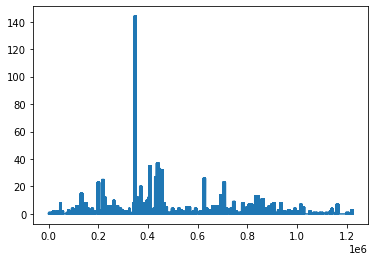

In [105]:
new_df['CV'].plot()

In [98]:
new_df['CV'] = 0

In [101]:
data_list = []
month_list = ['202001','202002','202004','202003','202005','202006']
for i in tqdm(range(len(new_df)), position=0, leave=True):
    for month in month_list:
         if new_df['REG_YYMM'][i]==int(month):
                new_df['CV'][i] = new_df['{}'.format(month)][i]

  0%|          | 0/1225754 [00:00<?, ?it/s]C:\Users\Joshua\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 1225754/1225754 [09:21<00:00, 2181.64it/s]


In [107]:
import seaborn as sns

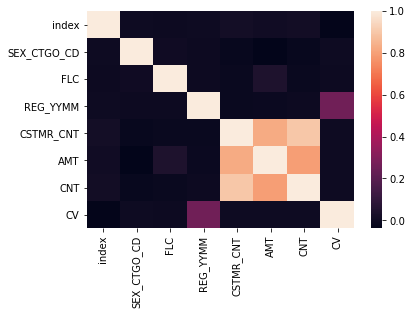

In [108]:
sns.heatmap(new_df.corr())

In [111]:
new_df.drop(['index'], axis=1, inplace=True)

In [113]:
new_df.drop(month_list, axis=1, inplace=True)

In [115]:
final_df = new_df

In [116]:
final_df.to_csv('./data/final_df.csv', index=False)